<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Data Manipulation, EDA, and Reporting Results

_Authors: Joseph Nelson (DC), Sam Stack (DC)_

---

> **This lab is intentionally open-ended, and you're encouraged to answer your own questions about the dataset!**


### What makes a song a hit?

On next week's episode of the 'Are You Entertained?' podcast, we're going to be analyzing the latest generation's guilty pleasure- the music of the '00s. 

Our Data Scientists have poured through Billboard chart data to analyze what made a hit soar to the top of the charts, and how long they stayed there. Tune in next week for an awesome exploration of music and data as we continue to address an omnipresent question in the industry- why do we like what we like?

**Provide (at least) a markdown cell explaining your key learnings about top hits: what are they, what common themes are there, is there a trend among artists (type of music)?**

---

### Minimum Requirements

**At a minimum, you must:**

- Use Pandas to read in your data
- Rename column names where appropriate
- Describe your data: check the value counts and descriptive statistics
- Make use of groupby statements
- Utilize Boolean sorting
- Assess the validity of your data (missing data, distributions?)

**You should strive to:**

- Produce a blog-post ready description of your lab
- State your assumptions about the data
- Describe limitations
- Consider how you can action this from a stakeholder perspective (radio, record label, fan)
- Include visualizations

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Billboard data CSV:
billboard_csv = './datasets/billboard.csv'

In [5]:
df = pd.read_csv(billboard_csv)
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Rename the columns

In [6]:
df.columns

Index([u'year', u'artist.inverted', u'track', u'time', u'genre',
       u'date.entered', u'date.peaked', u'x1st.week', u'x2nd.week',
       u'x3rd.week', u'x4th.week', u'x5th.week', u'x6th.week', u'x7th.week',
       u'x8th.week', u'x9th.week', u'x10th.week', u'x11th.week', u'x12th.week',
       u'x13th.week', u'x14th.week', u'x15th.week', u'x16th.week',
       u'x17th.week', u'x18th.week', u'x19th.week', u'x20th.week',
       u'x21st.week', u'x22nd.week', u'x23rd.week', u'x24th.week',
       u'x25th.week', u'x26th.week', u'x27th.week', u'x28th.week',
       u'x29th.week', u'x30th.week', u'x31st.week', u'x32nd.week',
       u'x33rd.week', u'x34th.week', u'x35th.week', u'x36th.week',
       u'x37th.week', u'x38th.week', u'x39th.week', u'x40th.week',
       u'x41st.week', u'x42nd.week', u'x43rd.week', u'x44th.week',
       u'x45th.week', u'x46th.week', u'x47th.week', u'x48th.week',
       u'x49th.week', u'x50th.week', u'x51st.week', u'x52nd.week',
       u'x53rd.week', u'x54th.week', u'x

In [16]:
new_columns = list(df.columns[:7])
for c in df.columns[7:]:
    new_columns.append('week_'+c[1:].replace('.week','')
                            .replace('st','')
                            .replace('nd','')
                            .replace('rd','')
                            .replace('th',''))

In [18]:
new_columns

['year',
 'artist.inverted',
 'track',
 'time',
 'genre',
 'date.entered',
 'date.peaked',
 'week_1',
 'week_2',
 'week_3',
 'week_4',
 'week_5',
 'week_6',
 'week_7',
 'week_8',
 'week_9',
 'week_10',
 'week_11',
 'week_12',
 'week_13',
 'week_14',
 'week_15',
 'week_16',
 'week_17',
 'week_18',
 'week_19',
 'week_20',
 'week_21',
 'week_22',
 'week_23',
 'week_24',
 'week_25',
 'week_26',
 'week_27',
 'week_28',
 'week_29',
 'week_30',
 'week_31',
 'week_32',
 'week_33',
 'week_34',
 'week_35',
 'week_36',
 'week_37',
 'week_38',
 'week_39',
 'week_40',
 'week_41',
 'week_42',
 'week_43',
 'week_44',
 'week_45',
 'week_46',
 'week_47',
 'week_48',
 'week_49',
 'week_50',
 'week_51',
 'week_52',
 'week_53',
 'week_54',
 'week_55',
 'week_56',
 'week_57',
 'week_58',
 'week_59',
 'week_60',
 'week_61',
 'week_62',
 'week_63',
 'week_64',
 'week_65',
 'week_66',
 'week_67',
 'week_68',
 'week_69',
 'week_70',
 'week_71',
 'week_72',
 'week_73',
 'week_74',
 'week_75',
 'week_76']

In [19]:
df.columns = new_columns

In [21]:
df.sample(5)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week_1,week_2,week_3,...,week_67,week_68,week_69,week_70,week_71,week_72,week_73,week_74,week_75,week_76
242,2000,"Loveless, Patty",That's The Kind Of Mood I'm In,3:27,Country,2000-09-16,2000-11-18,98,93.0,93.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,2000,Jagged Edge,He Can't Love U,3:30,Rock,1999-12-11,2000-01-08,54,32.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,2000,Baha Men,Who Let The Dogs Out,3:17,R&B,2000-07-22,2000-10-21,99,92.0,85.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,2000,Lonestar,Smile,3:33,Country,1999-12-18,2000-02-12,89,80.0,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,2000,Jay-Z,I Just Wanna Love U (Give It 2 Me),3:50,Rap,2000-10-28,2000-12-30,58,45.0,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df.shape

(317, 83)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 83 columns):
year               317 non-null int64
artist.inverted    317 non-null object
track              317 non-null object
time               317 non-null object
genre              317 non-null object
date.entered       317 non-null object
date.peaked        317 non-null object
week_1             317 non-null int64
week_2             312 non-null float64
week_3             307 non-null float64
week_4             300 non-null float64
week_5             292 non-null float64
week_6             280 non-null float64
week_7             269 non-null float64
week_8             260 non-null float64
week_9             253 non-null float64
week_10            244 non-null float64
week_11            236 non-null float64
week_12            222 non-null float64
week_13            210 non-null float64
week_14            204 non-null float64
week_15            197 non-null float64
week_16            182 no

In [25]:
df.describe()

,year,week_1,week_2,week_3,week_4,week_5,week_6,week_7,week_8,week_9,...,week_67,week_68,week_69,week_70,week_71,week_72,week_73,week_74,week_75,week_76
count,317.0,317.000000,312.000000,307.000000,300.000000,292.000000,280.000000,269.000000,260.000000,253.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2000.0,79.958991,71.173077,65.045603,59.763333,56.339041,52.360714,49.219331,47.119231,46.343874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,14.686865,18.200443,20.752302,22.324619,23.780022,24.473273,25.654279,26.370782,27.136419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2000.0,15.000000,8.000000,6.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2000.0,74.000000,63.000000,53.000000,44.750000,38.750000,33.750000,30.000000,27.000000,26.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2000.0,81.000000,73.000000,66.000000,61.000000,57.000000,51.500000,47.000000,45.500000,42.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2000.0,91.000000,84.000000,79.000000,76.000000,73.250000,72.250000,67.000000,67.000000,67.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2000.0,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000,99.000000,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


NOTE: the min is not always 1!!

# Let's check year

In [26]:
df['year'].unique()

array([2000])

In [29]:
df.drop('year',axis=1, inplace=True)

# Check the artists

In [173]:
print('unique artists: {}'.format(len(df['artist.inverted'].unique())))

unique artists: 228


Artists with more songs:

In [32]:
df['artist.inverted'].value_counts().head(10)

Jay-Z                   5
Houston, Whitney        4
Dixie Chicks, The       4
DMX                     3
Aguilera, Christina     3
McGraw, Tim             3
Backstreet Boys, The    3
Thomas, Carl            3
N'Sync                  3
Destiny's Child         3
Name: artist.inverted, dtype: int64

# Check the genre

In [174]:
df['genre'].value_counts()

Rock           137
Country         74
Rap             58
R&B             23
Pop              9
Latin            9
Electronica      4
Gospel           1
Jazz             1
Reggae           1
Name: genre, dtype: int64

In [52]:
df.groupby(['artist.inverted','genre']).size().sort_values(ascending=False)

artist.inverted           genre      
Jay-Z                     Rap            5
Houston, Whitney          Rock           4
Dixie Chicks, The         Country        4
Martin, Ricky             Latin          3
Rimes, LeAnn              Country        3
Destiny's Child           Rock           3
N'Sync                    Rock           3
Braxton, Toni             Rock           3
Sisqo                     Rock           3
Eminem                    Rap            3
SheDaisy                  Country        3
Thomas, Carl              Rock           3
Backstreet Boys, The      Rock           3
McGraw, Tim               Country        3
Spears, Britney           Rock           3
Jackson, Alan             Country        3
Price, Kelly              Rock           3
Limp Bizkit               Rock           3
Aguilera, Christina       Rock           3
DMX                       Rap            3
Lonestar                  Country        3
Red Hot Chili Peppers     Rock           2
Blige, Mary J.  

In [55]:
top_genres = ['Rock','Country','Rap','R&B']

df.fillna[df['genre'].isin(top_genres)].groupby('genre').mean()

,week_1,week_2,week_3,week_4,week_5,week_6,week_7,week_8,week_9,week_10,...,week_67,week_68,week_69,week_70,week_71,week_72,week_73,week_74,week_75,week_76
genre,,,,,,,,,,,,,,,,,,,,,
Country,82.405405,75.256757,71.808219,68.309859,65.271429,62.357143,57.692308,54.859375,52.983871,52.377049,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R&B,84.086957,74.095238,67.190476,60.894737,61.473684,56.000000,58.294118,63.294118,62.062500,63.866667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rap,85.172414,76.228070,68.781818,63.925926,60.384615,55.714286,53.723404,50.255814,51.976744,53.380952,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rock,76.116788,66.852941,60.298507,54.015267,49.330709,45.894309,42.689076,40.234783,38.819820,35.895238,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
df[['week_1','week_2']].max()

week_1    100.0
week_2    100.0
dtype: float64

In [65]:
df[['week_1','week_2']].min()

week_1    15.0
week_2     8.0
dtype: float64

In [72]:
genre2color = {'Rock':'red',
               'Country':'yellow',
               'Rap':'black',
               'R&B':'purple'}

In [176]:
# plt.figure(figsize=(10,5))
# for i in range(200):#range(len(df)):
#     row = df.loc[i]
#     values = 100 - row.fillna(100).values[7:]
#     x = range(1,len(values)+1)
#     plt.plot(x,values,lw=1, alpha=0.5, color=genre2color.get(row['genre'],'grey'))
# plt.show()

# Genre + position for each song

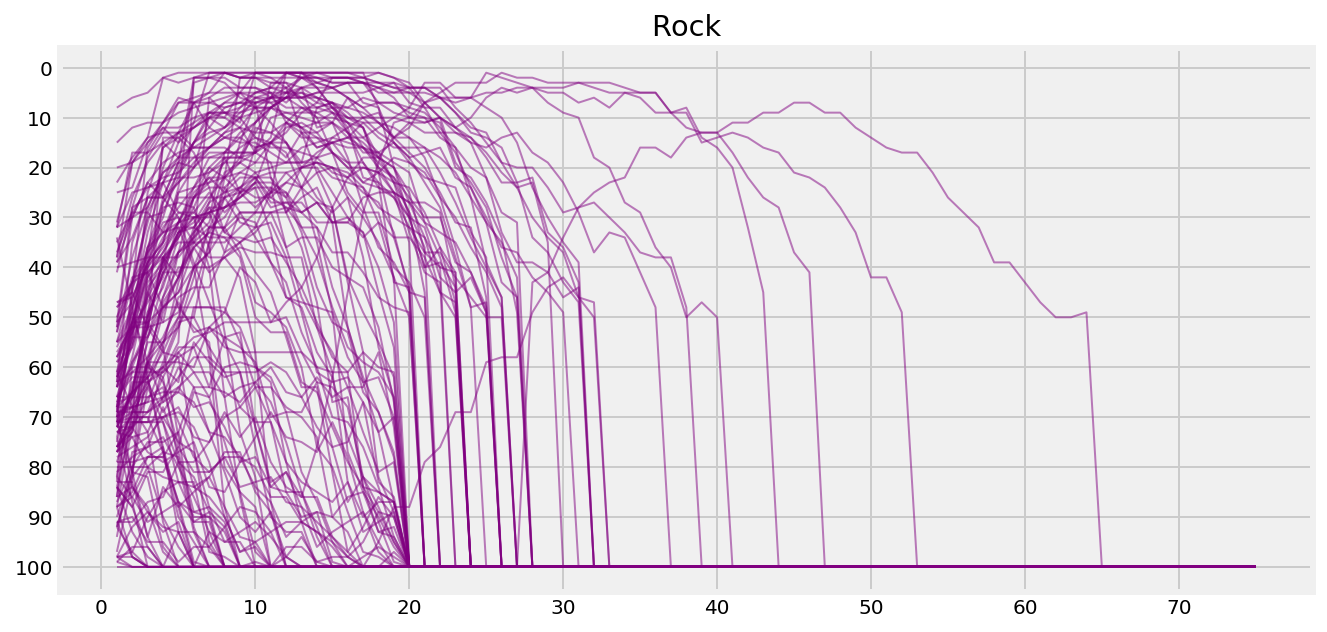

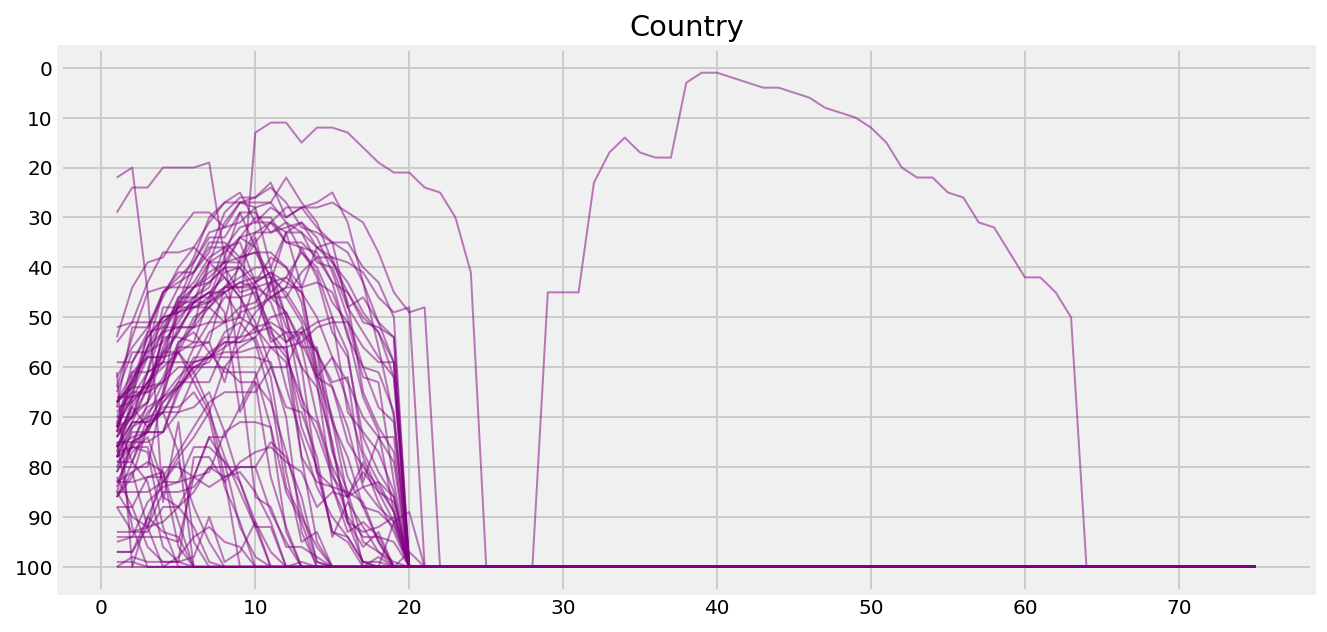

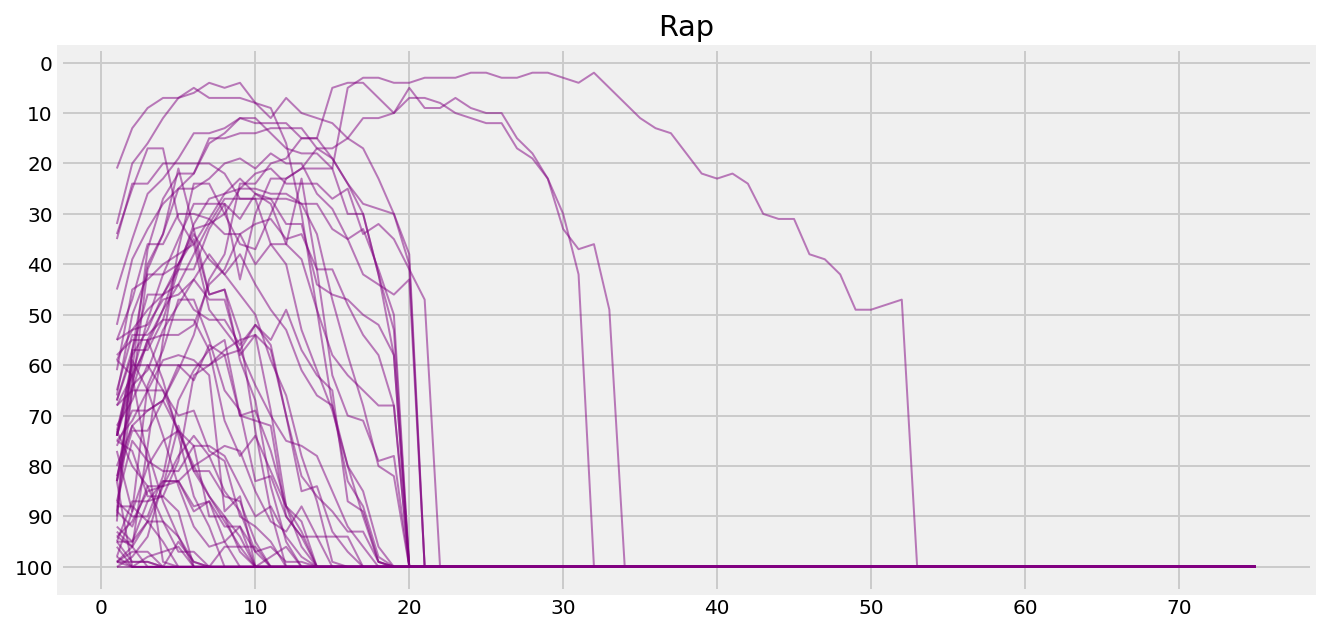

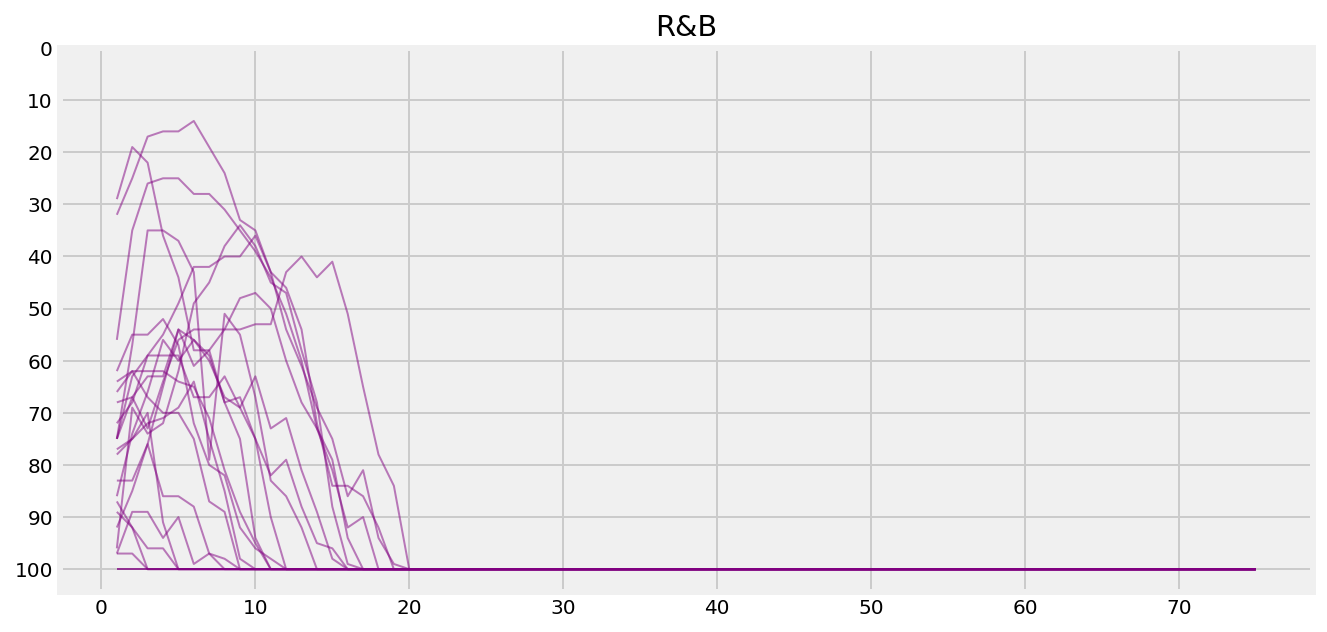

In [83]:

for genre in top_genres:
    plt.figure(figsize=(10,5))
    df_genre = df[df['genre']==genre].reset_index(drop=True).copy()
    for i in range(len(df_genre)):
        row = df_genre.loc[i]
        values = 100 - row.fillna(100).values[7:]
        x = range(1,len(values)+1)
        plt.plot(x,values,lw=1, alpha=0.5,c='purple')
    plt.yticks(range(0,100+1,10), range(100,0-1,-10))
    plt.title(genre)
    plt.show()

# Date peaked - date entered  
How many days from enter to peak?

In [98]:
df['days_to_peak'] = (pd.to_datetime(df['date.peaked']) - pd.to_datetime(df['date.entered']))
df['days_to_peak'] = df['days_to_peak'].apply(lambda x: x.days)

In [99]:
df['days_to_peak'].head()

0    56
1    56
2    98
3    35
4    70
Name: days_to_peak, dtype: int64

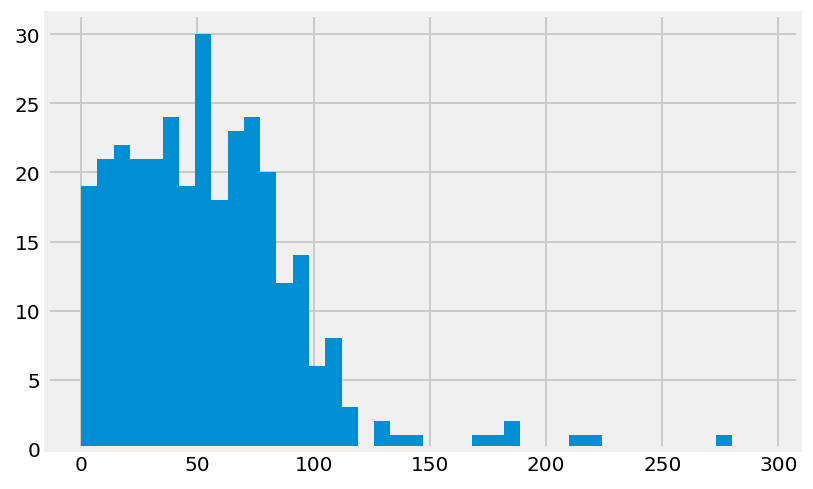

In [105]:
df['days_to_peak'].hist(bins=range(0,300,7))

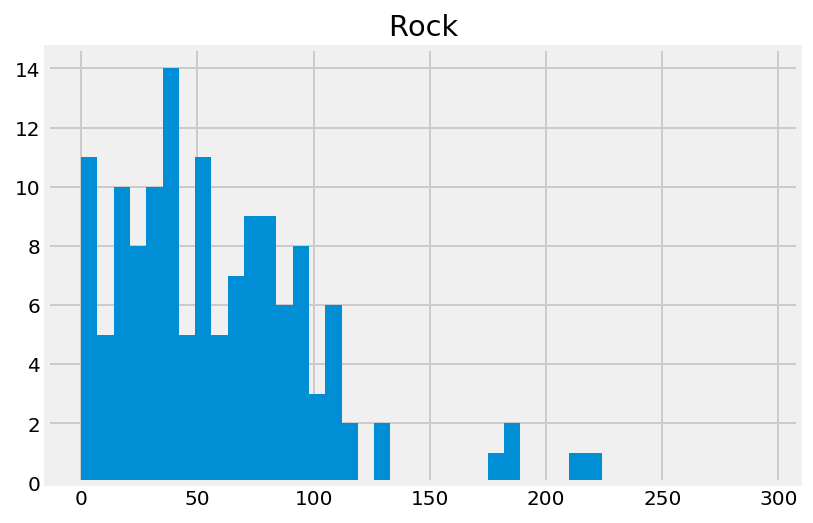

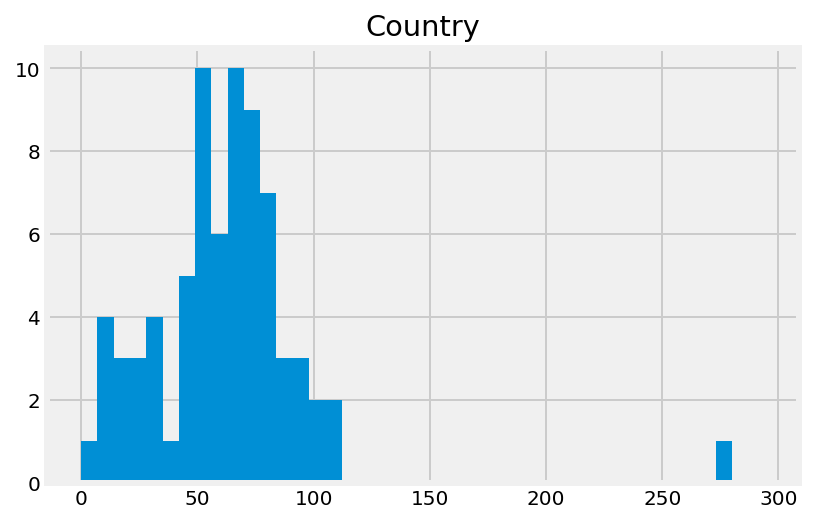

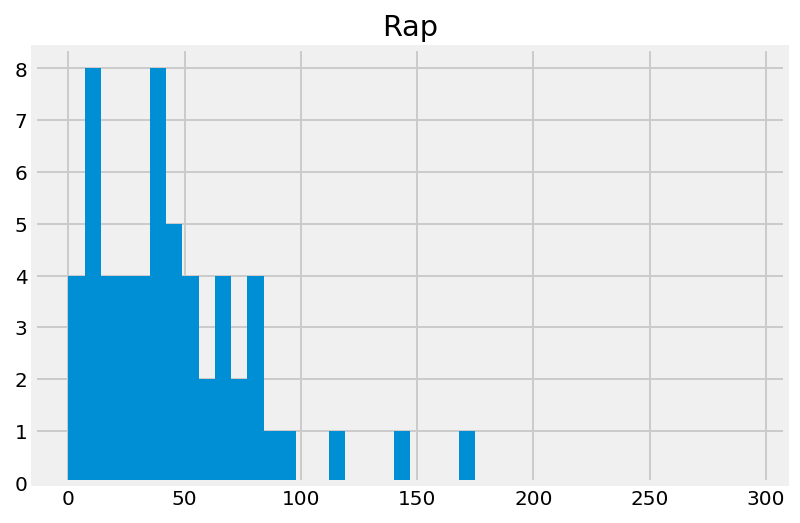

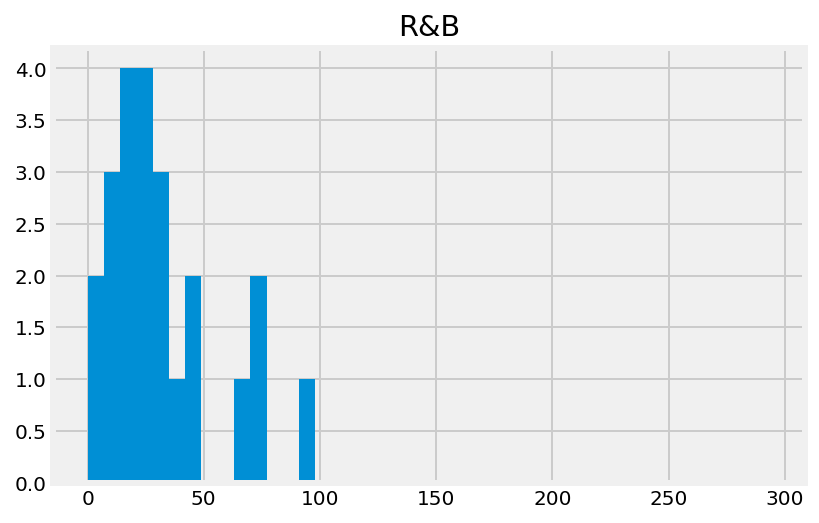

In [109]:
for genre in top_genres:
    plt.hist(df[df['genre']==genre]['days_to_peak'],bins=range(0,300,7))
    plt.title(genre)
    plt.show()

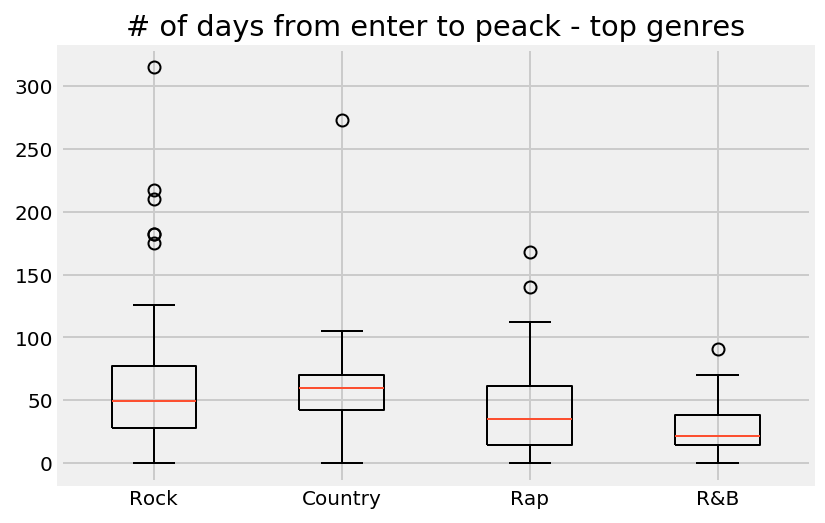

In [175]:
plt.boxplot([df[df['genre']==genre]['days_to_peak'] for genre in top_genres])
plt.xticks(range(1,len(top_genres)+1), top_genres)
plt.title('# of days from enter to peack - top genres')
plt.show()

# How many weeks in top100?

In [127]:
week_columns = [c for c in df.columns if 'week_' in c]
week_columns

['week_1',
 'week_2',
 'week_3',
 'week_4',
 'week_5',
 'week_6',
 'week_7',
 'week_8',
 'week_9',
 'week_10',
 'week_11',
 'week_12',
 'week_13',
 'week_14',
 'week_15',
 'week_16',
 'week_17',
 'week_18',
 'week_19',
 'week_20',
 'week_21',
 'week_22',
 'week_23',
 'week_24',
 'week_25',
 'week_26',
 'week_27',
 'week_28',
 'week_29',
 'week_30',
 'week_31',
 'week_32',
 'week_33',
 'week_34',
 'week_35',
 'week_36',
 'week_37',
 'week_38',
 'week_39',
 'week_40',
 'week_41',
 'week_42',
 'week_43',
 'week_44',
 'week_45',
 'week_46',
 'week_47',
 'week_48',
 'week_49',
 'week_50',
 'week_51',
 'week_52',
 'week_53',
 'week_54',
 'week_55',
 'week_56',
 'week_57',
 'week_58',
 'week_59',
 'week_60',
 'week_61',
 'week_62',
 'week_63',
 'week_64',
 'week_65',
 'week_66',
 'week_67',
 'week_68',
 'week_69',
 'week_70',
 'week_71',
 'week_72',
 'week_73',
 'week_74',
 'week_75',
 'week_76']

In [130]:
df['null_weeks'] = df[week_columns].isnull().sum(axis=1)
df['weeks_top100'] = 76 - df['null_weeks']

In [132]:
df[['null_weeks','weeks_top100']].head()

,null_weeks,weeks_top100
0,48,28
1,50,26
2,43,33
3,52,24
4,55,21


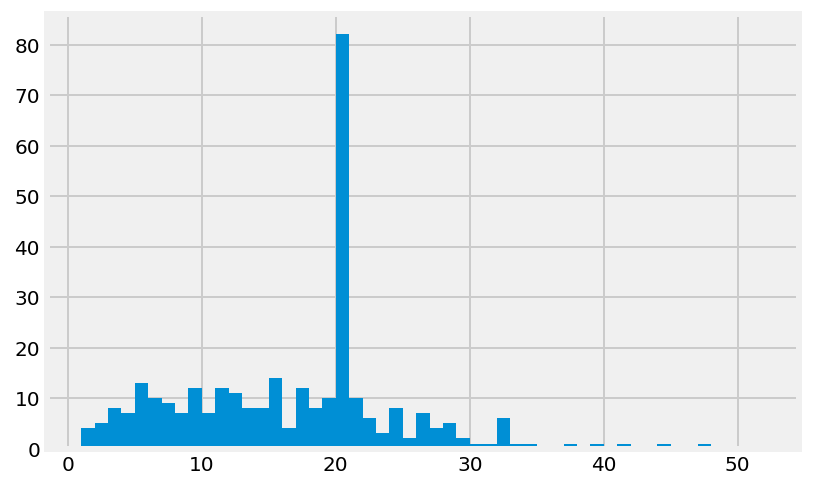

In [135]:
df['weeks_top100'].hist(bins=range(1,52+1,1))

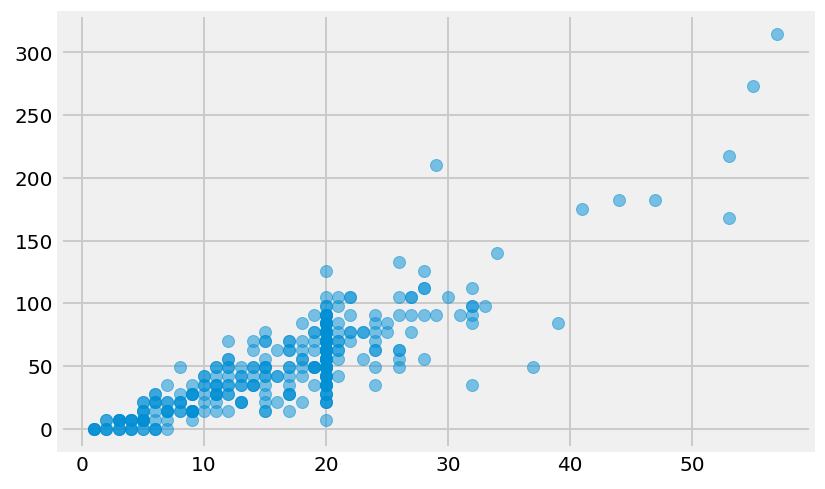

In [139]:
plt.scatter(df['weeks_top100'],df['days_to_peak'],alpha=0.5)

# WHY 20?!?!

In [172]:
df['weeks_top100'].value_counts().head(10)

20    82
15    14
5     13
11    12
9     12
17    12
12    11
19    10
21    10
6     10
Name: weeks_top100, dtype: int64

In [137]:
df[df['weeks_top100']==20]

,artist.inverted,track,time,genre,date.entered,date.peaked,week_1,week_2,week_3,week_4,...,week_70,week_71,week_72,week_73,week_74,week_75,week_76,days_to_peak,null_weeks,weeks_top100
7,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24,63,45.0,34.0,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84,56,20
16,"Carey, Mariah",Thank God I Found You,4:14,Rock,1999-12-11,2000-02-19,82,68.0,50.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70,56,20
22,98�,Give Me Just One Night (Una Noche),3:24,Rock,2000-08-19,2000-09-30,51,39.0,34.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,56,20
43,Eiffel 65,Blue (Da Ba Dee),3:29,Electronica,1999-12-11,2000-01-29,67,29.0,16.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49,56,20
44,"Badu, Erkyah",Bag Lady,5:03,Rock,2000-08-19,2000-10-07,67,53.0,42.0,41.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49,56,20
51,"Spears, Britney",Oops!.. I Did It Again,3:30,Rock,2000-04-22,2000-06-10,67,38.0,26.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49,56,20
52,"Backstreet Boys, The",Shape Of My Heart,3:49,Rock,2000-10-14,2000-12-02,39,25.0,24.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49,56,20
54,Ja Rule,Between Me And You,4:05,Rap,2000-09-16,2000-11-18,85,74.0,61.0,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,56,20
59,Filter,Take A Picture,4:23,Rock,1999-11-27,2000-02-05,91,74.0,64.0,52.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70,56,20
61,Mystikal,Shake Ya Ass,4:46,Rap,2000-08-12,2000-10-28,97,90.0,65.0,41.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77,56,20


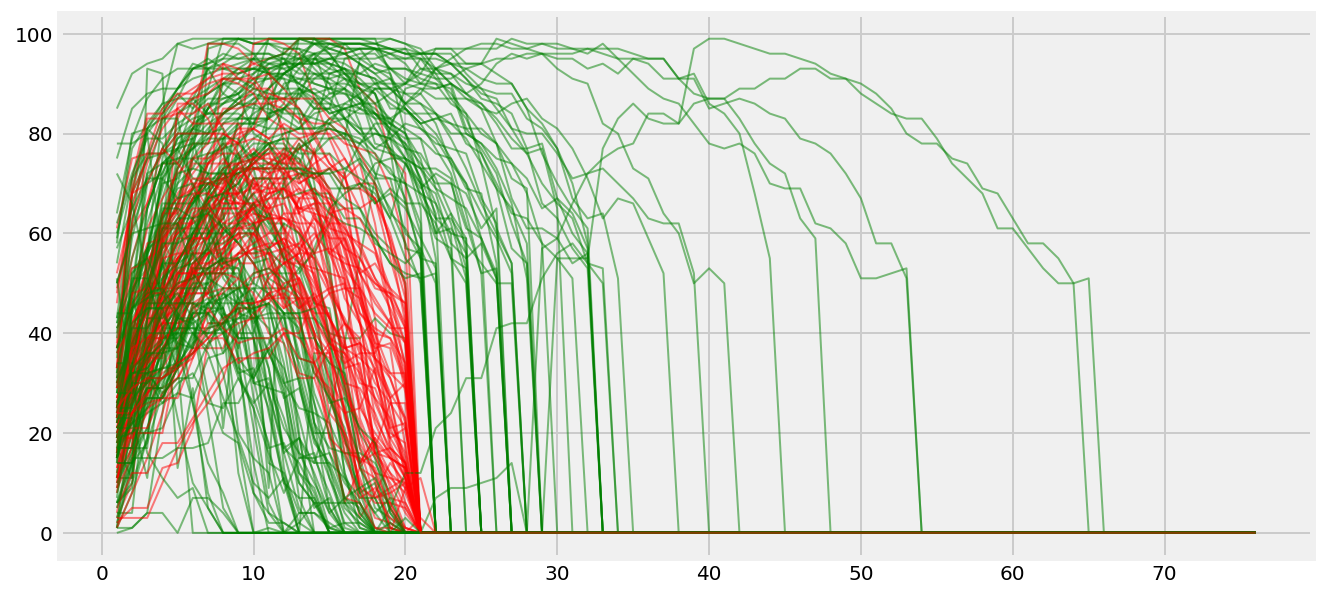

In [180]:
plt.figure(figsize=(10,5))
for i in range(200):#range(len(df)):
    row = df.loc[i]
    if row['weeks_top100']==20:
        color='red'
    else:
        color='green'
    values = 100 - row.fillna(100)[week_columns].values
    x = range(1,len(values)+1)
    plt.plot(x,values,lw=1, alpha=0.5, color=color)
plt.show()

In [183]:
df['weeks_top100_is20'] = (df['weeks_top100']==20).astype(int)

In [186]:
df.groupby('weeks_top100_is20').mean()[['weeks_top100','time_sec','average_position']]

,weeks_top100,time_sec,average_position
weeks_top100_is20,,,
0,15.604255,243.434043,63.518649
1,20.000000,239.536585,53.856098


# Time

In [143]:
df['time_sec'] = df['time'].apply(lambda t: int(t.split(':')[0])*60 + int(t.split(':')[1]))

In [144]:
df[['time','time_sec']].sample(10)

,time,time_sec
96,4:09,249
136,3:52,232
73,3:55,235
316,3:22,202
134,3:51,231
140,4:00,240
308,4:24,264
2,4:07,247
146,3:36,216
192,3:41,221


In [147]:
df.groupby('genre').mean()[['time_sec']]

,time_sec
genre,
Country,226.689189
Electronica,270.750000
Gospel,330.000000
Jazz,470.000000
Latin,254.444444
Pop,225.000000
R&B,242.956522
Rap,243.396552
Reggae,257.000000


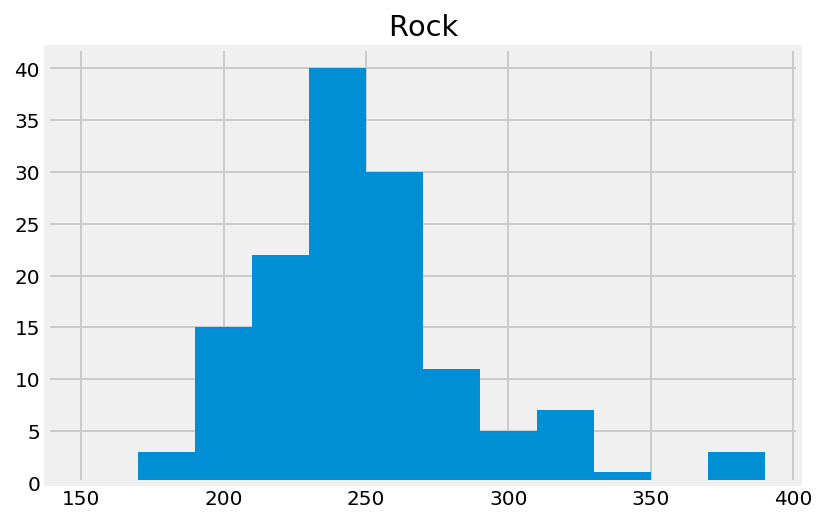

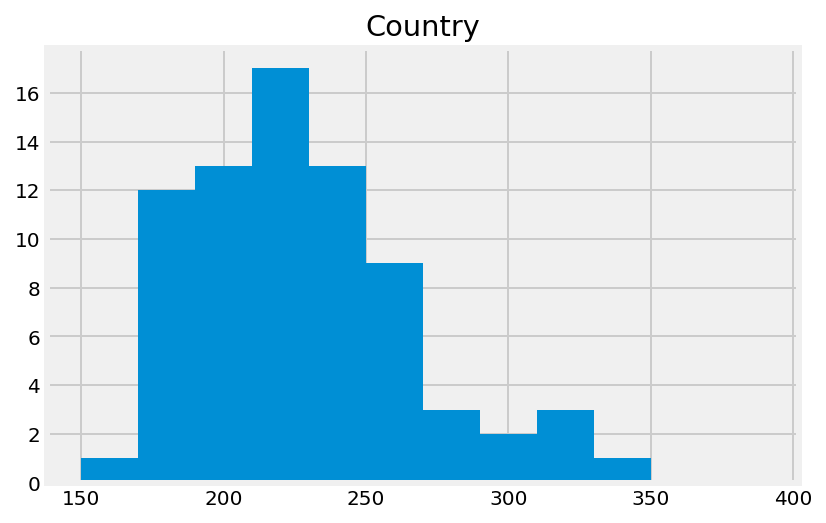

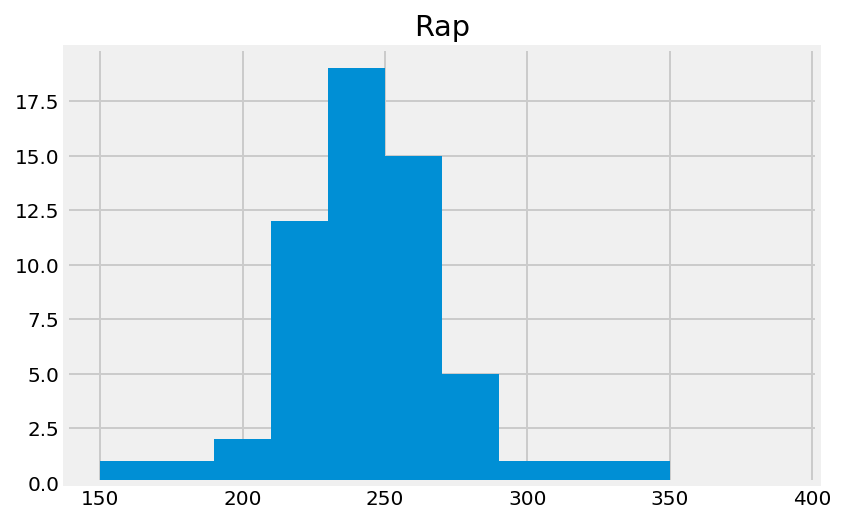

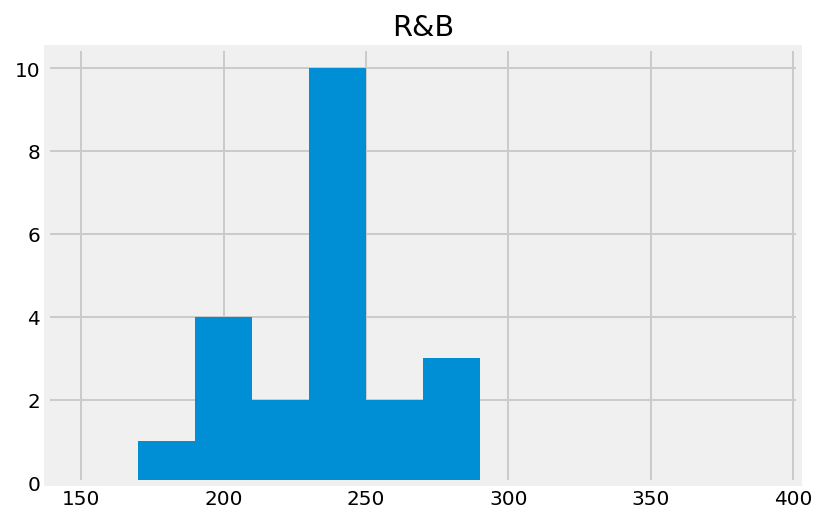

In [150]:
for genre in top_genres:
    plt.hist(df[df['genre']==genre]['time_sec'],bins=range(150,400,20))
    plt.title(genre)
    plt.show()

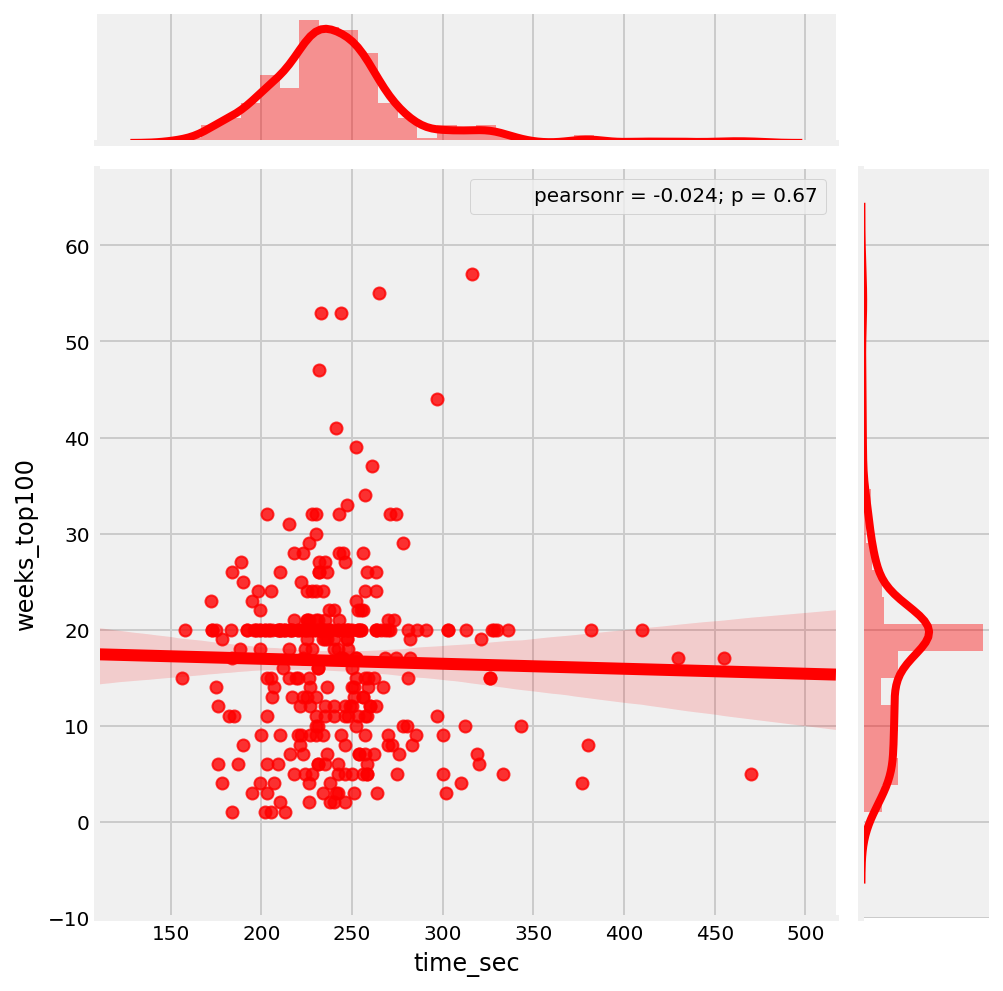

In [162]:
sns.jointplot("time_sec", "weeks_top100", data=df, kind="reg",
                   color="r", size=7)

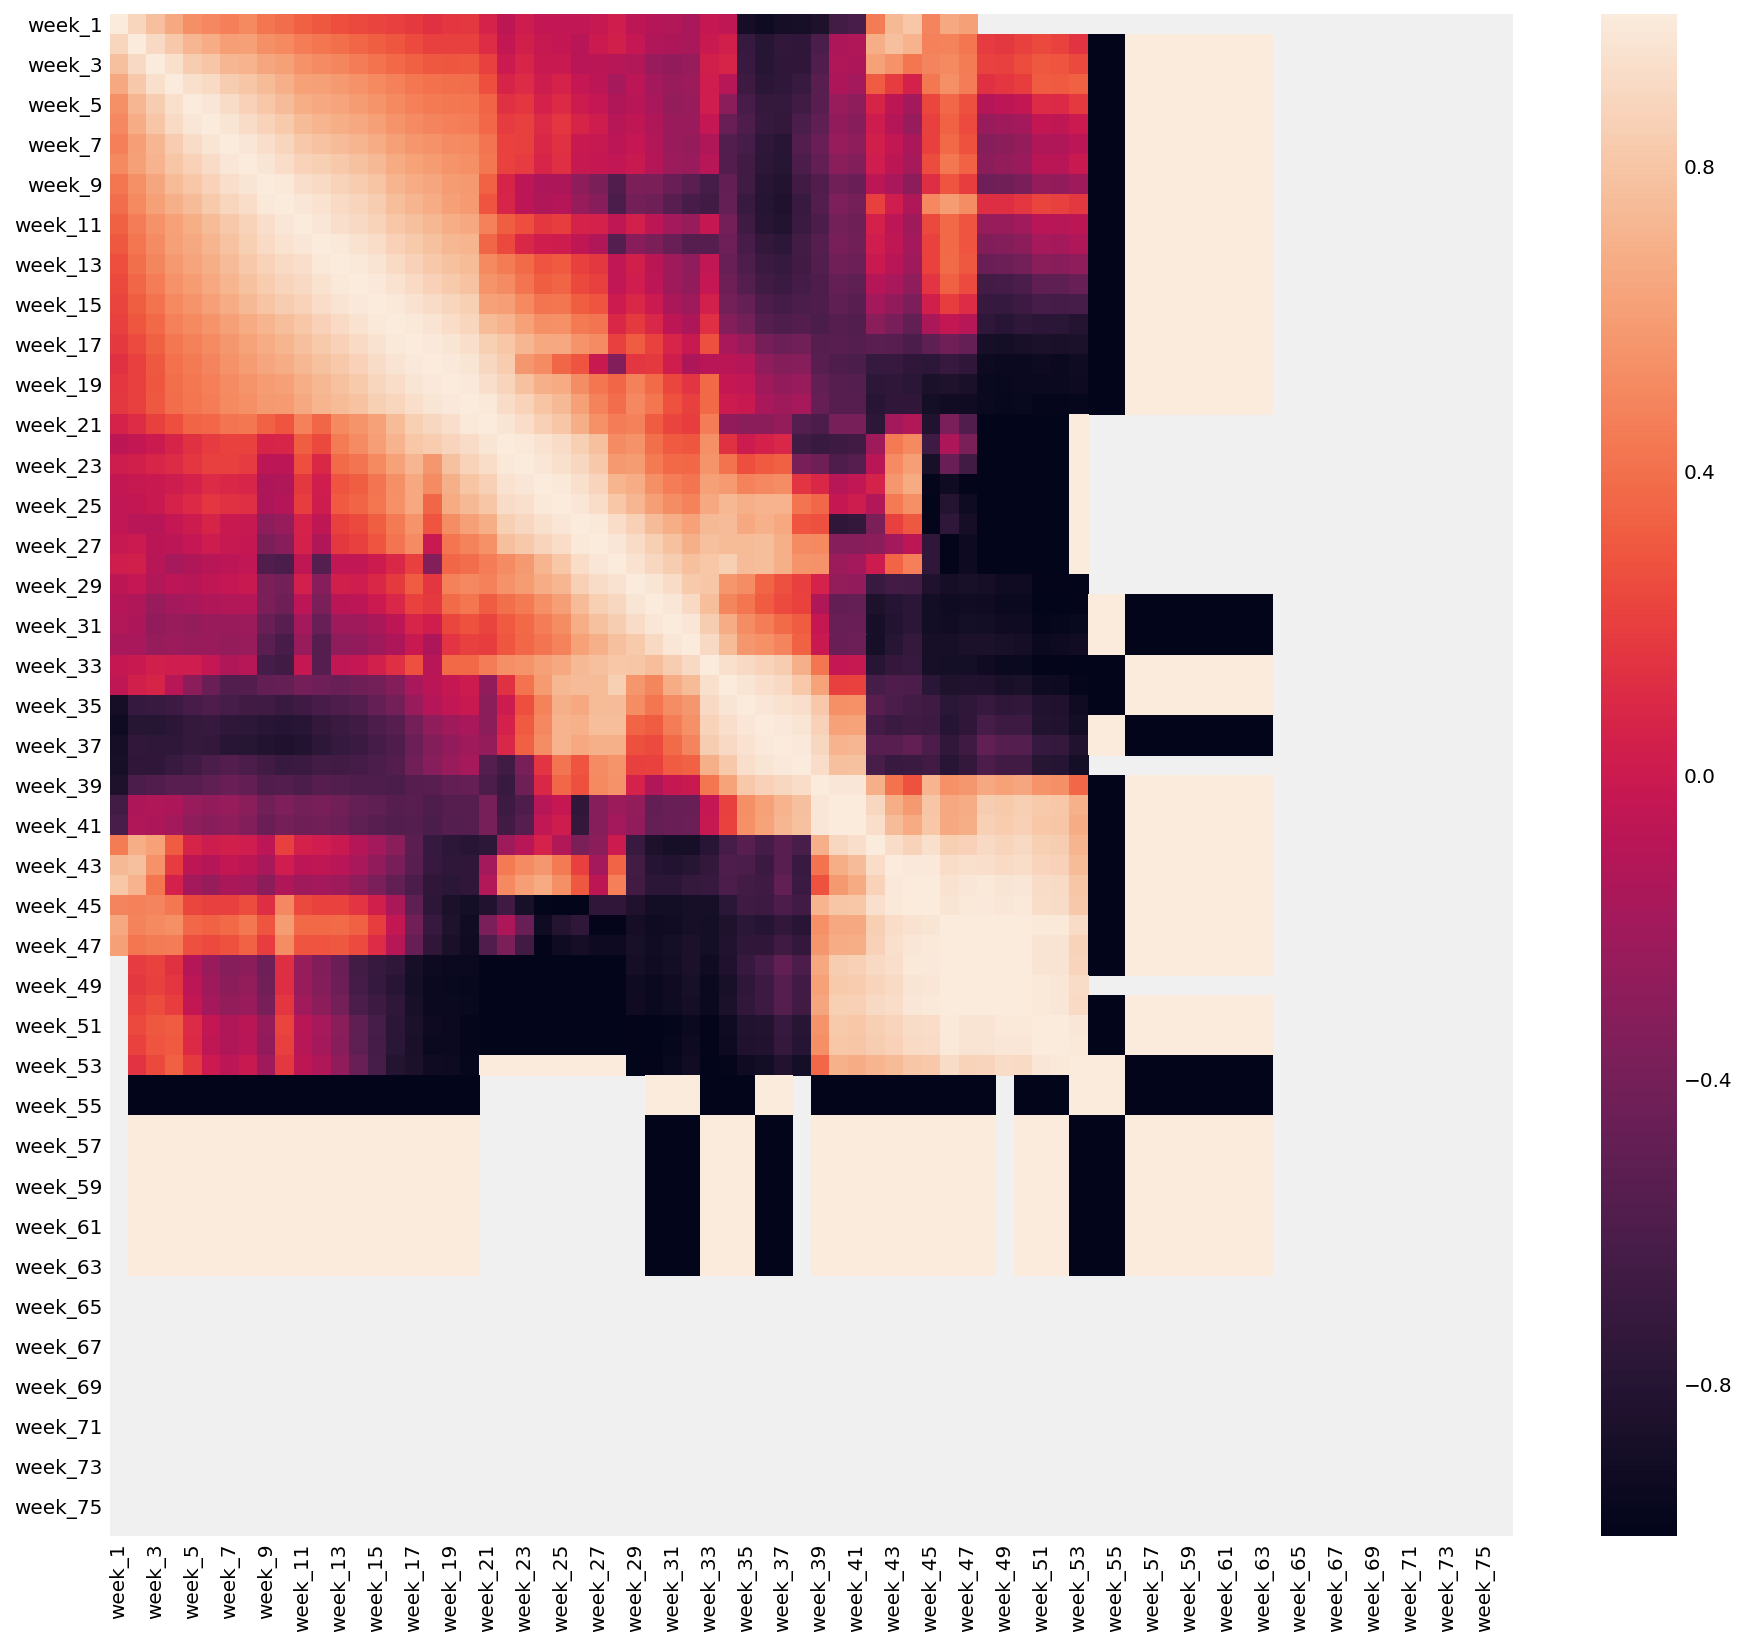

In [163]:
plt.figure(figsize=(14,14))
sns.heatmap(df[week_columns].corr())

# Average position

In [168]:
df['average_position'] = df[week_columns].mean(axis=1)

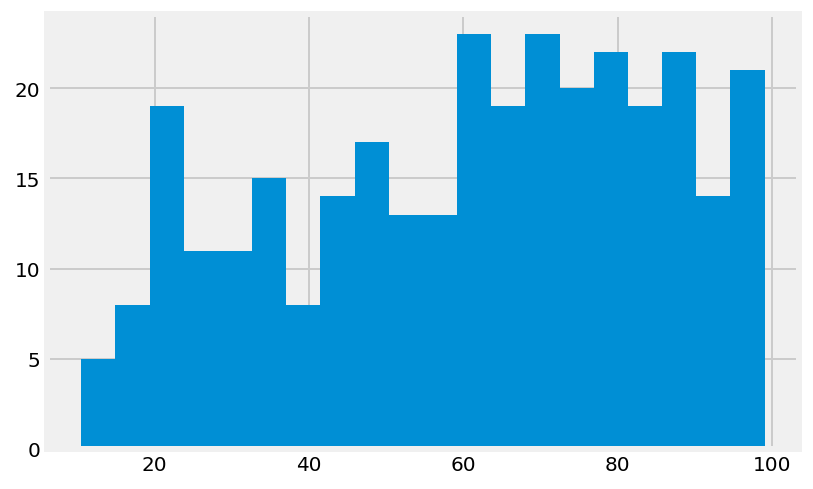

In [170]:
df['average_position'].hist(bins=20)

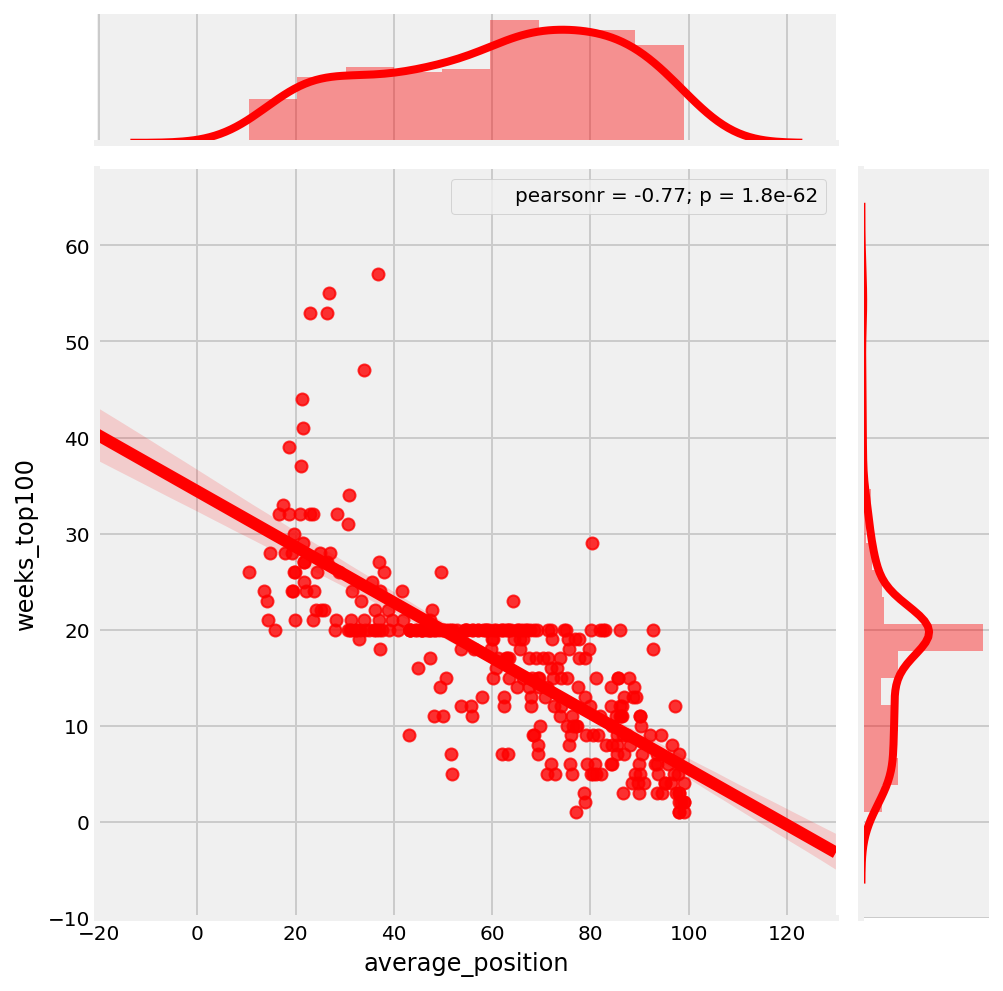

In [171]:
sns.jointplot("average_position", "weeks_top100", data=df, kind="reg",
                   color="r", size=7)

The worse is the average position, the less a song is going to remain in the top 100

# Titles

In [203]:
word2occ = {}
for title in df['track'].values:
    title = title.lower()\
                 .replace('\'',' ')\
                 .replace('(','')\
                 .replace(')','')
    for word in title.split(' '):
        word2occ[word] = word2occ.get(word,0)+1

In [215]:
import operator

sorted(word2occ.items(), key=operator.itemgetter(1), reverse=True)[:20]

[('you', 42),
 ('i', 40),
 ('the', 37),
 ('me', 25),
 ('it', 25),
 ('love', 22),
 ('t', 17),
 ('s', 16),
 ('of', 15),
 ('my', 14),
 ('a', 13),
 ('', 12),
 ('what', 12),
 ('be', 11),
 ('to', 10),
 ('do', 9),
 ('in', 9),
 ('up', 9),
 ('can', 8),
 ('that', 8)]